<a href="https://colab.research.google.com/github/shvnshnn02/MesinLearning2023/blob/main/%5BTI_3D%5D_ML_KUIS1_28_2141720252_Shovinas_Hanun_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KUIS 1**

KELOMPOK 10

NAMA KELOMPOK:

1. Andhito Galih Nur Cahyo (07/2141720138)

2. Aulia Cahya Briliana (09/2141720092)

3. Shovinas Hanun (28/2141720252)



**Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST**


**DETAIL KUIS**


In [ ]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

**NO 1**

Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset
MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!


In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Menghitung jumlah data untuk setiap label (0-9) pada data latih
label_counts = np.bincount(y_train)

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f'Jumlah data untuk label {i}: {label_counts[i]}')

# Menampilkan informasi tentang ketidakseimbangan data
print('Apakah terdapat data imbalance?')
print('Ya' if np.max(label_counts) - np.min(label_counts) > 1000 else 'Tidak')

Jumlah data untuk label 0: 5923
Jumlah data untuk label 1: 6742
Jumlah data untuk label 2: 5958
Jumlah data untuk label 3: 6131
Jumlah data untuk label 4: 5842
Jumlah data untuk label 5: 5421
Jumlah data untuk label 6: 5918
Jumlah data untuk label 7: 6265
Jumlah data untuk label 8: 5851
Jumlah data untuk label 9: 5949
Apakah terdapat data imbalance?
Ya


**NO 2**

 Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat
 menggunakan referensi dari Job Sheet 03.

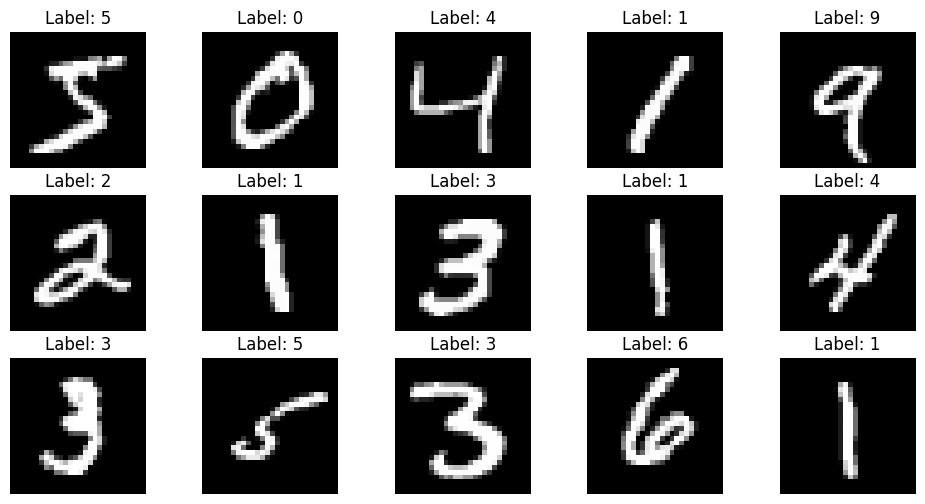

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Memuat dataset MNIST
(x_train, y_train), (_, _) = mnist.load_data()

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

**NO 3**

Lakukan proses ekstraksi tur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi tur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape citra menjadi vektor 1D
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Normalisasi nilai piksel ke rentang 0 hingga 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Sekarang x_train adalah matriks fitur dengan setiap baris adalah vektor fitur dari satu citra

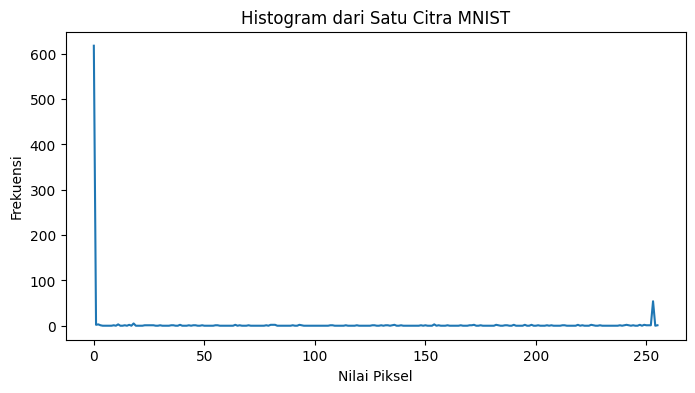

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Fungsi untuk menghitung histogram citra
def compute_histogram(image):
    # Hitung histogram citra dengan 256 bin (untuk gambar grayscale)
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    return hist

# Ekstraksi fitur histogram dari seluruh dataset
x_train_histogram = np.array([compute_histogram(image) for image in x_train])

# Tampilkan histogram dari satu citra
plt.figure(figsize=(8, 4))
plt.plot(x_train_histogram[0])
plt.title("Histogram dari Satu Citra MNIST")
plt.xlabel("Nilai Piksel")
plt.ylabel("Frekuensi")
plt.show()

**NO 4**

Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Data Anda (gantilah ini dengan data Anda)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# Rasio 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

# Rasio 80:20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Rasio 90:10
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

# Tampilkan ukuran setiap bagian data
print("Rasio 70:30")
print("Data Training:", X_train_70.shape, y_train_70.shape)
print("Data Testing:", X_test_30.shape, y_test_30.shape)
print("")

print("Rasio 80:20")
print("Data Training:", X_train_80.shape, y_train_80.shape)
print("Data Testing:", X_test_20.shape, y_test_20.shape)
print("")

print("Rasio 90:10")
print("Data Training:", X_train_90.shape, y_train_90.shape)
print("Data Testing:", X_test_10.shape, y_test_10.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


NameError: ignored

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Data Anda (contoh)

# Pembagian data dengan rasio 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

# Pembagian data dengan rasio 80:20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Pembagian data dengan rasio 90:10
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

# Tampilkan ukuran setiap bagian data
print("Rasio 70:30")
print("Data Training:", X_train_70.shape, y_train_70.shape)
print("Data Testing:", X_test_30.shape, y_test_30.shape)
print("")

print("Rasio 80:20")
print("Data Training:", X_train_80.shape, y_train_80.shape)
print("Data Testing:", X_test_20.shape, y_test_20.shape)
print("")

print("Rasio 90:10")
print("Data Training:", X_train_90.shape, y_train_90.shape)
print("Data Testing:", X_test_10.shape, y_test_10.shape)


Rasio 70:30
Data Training: (70,) (70,)
Data Testing: (30,) (30,)

Rasio 80:20
Data Training: (80,) (80,)
Data Testing: (20,) (20,)

Rasio 90:10
Data Training: (90,) (90,)
Data Testing: (10,) (10,)


**NO 5**

 Lakukan proses klasikasi dengan menggunakan algoritma Naive Bayes dan SVM.
 - Anda diperbolehkan untuk melakukan tunning parameter.
 - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.